In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
from astropy.wcs import WCS
from astropy.wcs import Wcsprm
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from reproject import reproject_interp
from astropy.visualization import make_lupton_rgb
from astropy.visualization import SqrtStretch
from astropy.visualization import ZScaleInterval

/Users/amymiller/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
hdu={}
wcs={}

In [3]:
tile='6_6'
for filename in os.listdir("/Volumes/T7/VMC /LMC/"+tile):
    #print(filename)
    #print(filename[-1])
    
    if (filename[-1]=='t') & (filename[0]=='e'):
        
        print(filename)
        print(filename[18:21])
        hdu[filename[18:21]] = fits.open("/Volumes/T7/VMC /LMC/"+tile+'/'+filename)[1]
        wcs[filename[18:21]] = WCS(hdu[filename[18:21]].header)

e20191014_00130000215_dp_st_tl.fit
215
e20191014_00130000214_dp_st_tl.fit
214
e20191014_00130000213_dp_st_tl.fit
213


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set DATE-END to '2010-11-10T08:04:24.776' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2009-11-20T06:28:07.444' from MJD-END'. [astropy.wcs.wcs]


Text(0.5, 1.0, 'Y')

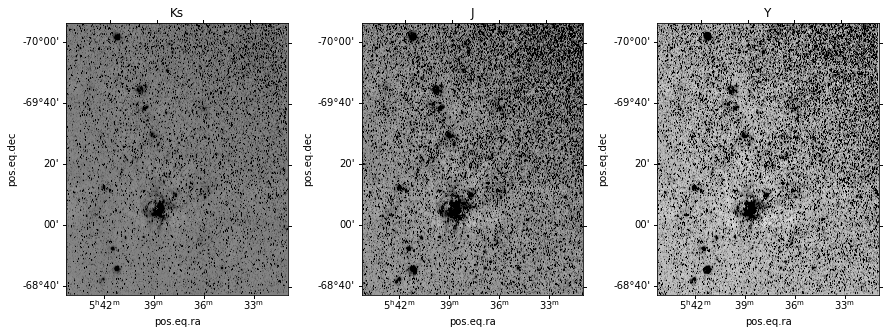

In [4]:
plt.figure(figsize=(15,5))

key='215'
ax1 = plt.subplot(131,projection=wcs[key])
ax1.imshow(hdu[key].data,vmin=6450,vmax=6550,cmap='gray_r',origin='lower')
ax1.set_title('Ks')

key='214'
ax2 = plt.subplot(132,projection=wcs[key])
ax2.imshow(hdu[key].data,vmin=2200,vmax=2275,cmap='gray_r',origin='lower')
ax2.set_title('J')

key='213'
ax3 = plt.subplot(133,projection=wcs[key])
ax3.imshow(hdu[key].data,vmin=610,vmax=680,cmap='gray_r',origin='lower')
ax3.set_title('Y')
    

In [5]:
array={}
footprint={}

In [6]:
# reproject 215 (Ks) onto 213 (Y) projection

#fcn returns reprojected array as well as an array that provides 
#info on the footprint of the first image in the new reprojected
#image plane (essentially which pixels in the new image had a 
#corresponding pixel in the image)

array['215'],footprint['215'] = reproject_interp(hdu['215'],hdu['213'].header)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set DATE-END to '2010-11-10T08:04:24.776' from MJD-END'. [astropy.wcs.wcs]


In [7]:
array['214'],footprint['214'] = reproject_interp(hdu['214'],hdu['213'].header)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set DATE-END to '2009-11-20T06:28:07.444' from MJD-END'. [astropy.wcs.wcs]


In [8]:
stretch = SqrtStretch() + ZScaleInterval()


In [9]:
r = array['215']
g = array['214']
b = hdu['213'].data

In [10]:
r = stretch(r)
g = stretch(g)
b = stretch(b)

In [11]:
r[np.isnan(r)]=np.nanmean(r)
g[np.isnan(g)]=np.nanmean(g)
b[np.isnan(b)]=np.nanmean(b)

In [12]:
# Get the value of lower and upper 0.5% of all pixels

lo_val, up_val = np.percentile(np.hstack((r.flatten(), g.flatten(), b.flatten())), (0.5, 99.5))  


In [13]:
stretch_val = up_val - lo_val

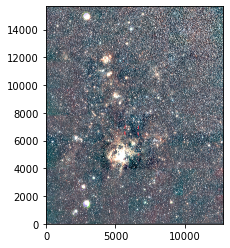

In [14]:
rgb_default1 = make_lupton_rgb(r, g, b, minimum=lo_val, stretch=stretch_val, Q=0)

plt.imshow(rgb_default1, origin='lower')
plt.show()